<a href="https://colab.research.google.com/github/ngcthanh2903/pytorch/blob/main/cifar10torchGPUnewbetter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import cifar10

In [2]:
(x_train, y_train), (x_test, y_test) =cifar10.load_data()
print(x_test.dtype)

170508288/170498071 [==============================] - 2s 0us/step
uint8


In [3]:
x_train=x_train.reshape(-1,3,32,32)
x_test=x_test.reshape(-1,3,32,32)


In [4]:
print(x_train.shape)
print(x_test.shape)

(50000, 3, 32, 32)
(10000, 3, 32, 32)


In [5]:
import torch
import torch.nn as nn
import torch.optim.adam as adam
from torch.nn import CrossEntropyLoss
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torch.utils.data import TensorDataset
from torchsummary import summary
import matplotlib.pyplot as plt
import os
from PIL import Image
import torchvision.transforms as transforms
import torch.nn.functional as F
import numpy as np


In [6]:
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)
x_test = torch.from_numpy(x_test)
y_test = torch.from_numpy(y_test)
x_train = x_train.to(torch.float32)
x_test = x_test.to(torch.float32)

In [7]:
batch_size =64
train_ds = TensorDataset(x_train,y_train)
test_ds = TensorDataset(x_test,y_test)
train_dl = DataLoader(train_ds,batch_size,shuffle=True)
test_dl = DataLoader(test_ds,batch_size,shuffle=True)

In [8]:
y_train.shape


torch.Size([50000, 1])

In [9]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3,padding=2)
        self.conv2 = nn.Conv2d(32,64,kernel_size= 3,padding=2)
        self.conv3 = nn.Conv2d(64,64,kernel_size=3,padding=2)
        self.conv3_drop = nn.Dropout2d()
        self.conv4 = nn.Conv2d(64,128,kernel_size=3,padding=2)
        self.fc1 = nn.Linear(1152, 100)
        self.fc2 = nn.Linear(100, 10)

        
    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = F.relu(F.max_pool2d(self.conv3_drop(self.conv3(x)), 2))
        x = F.relu(F.max_pool2d(self.conv4(x), 2))
        #print(x.shape)
        #print(x.reshape(x.shape[0],-1).shape)
        x = x.view(-1, 1152)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

In [ ]:
from torchsummary import summary
model = Net()
#model.cuda()
model.to(device)
summary(model, (3, 32, 32))
loss_fn = CrossEntropyLoss()

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 34, 34]             896
            Conv2d-2           [-1, 64, 19, 19]          18,496
            Conv2d-3           [-1, 64, 11, 11]          36,928
         Dropout2d-4           [-1, 64, 11, 11]               0
            Conv2d-5            [-1, 128, 7, 7]          73,856
            Linear-6                  [-1, 100]         115,300
            Linear-7                   [-1, 10]           1,010
Total params: 246,486
Trainable params: 246,486
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.63
Params size (MB): 0.94
Estimated Total Size (MB): 1.58
----------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


In [ ]:
model = nn.Sequential()
model.add_module('conv1',nn.Conv2d(3,32,kernel_size=3,padding = 'same'))
model.add_module('relu1',nn.ReLU())
model.add_module('conv2',nn.Conv2d(32,32,kernel_size=3,padding='same'))
model.add_module('relu2',nn.ReLU())
model.add_module('pool1',nn.MaxPool2d(2))
model.add_module('bn1',nn.BatchNorm2d(32))

model.add_module('conv3',nn.Conv2d(32,64,kernel_size=3,padding = 'same'))
model.add_module('relu3',nn.ReLU())
model.add_module('conv4',nn.Conv2d(64,64,kernel_size=3,padding='same'))
model.add_module('relu4',nn.ReLU())
model.add_module('pool2',nn.MaxPool2d(2))
model.add_module('bn2',nn.BatchNorm2d(64))

model.add_module('conv5',nn.Conv2d(64,128,kernel_size=3,padding = 'same'))
model.add_module('relu5',nn.ReLU())
model.add_module('conv6',nn.Conv2d(128,128,kernel_size=3,padding='same'))
model.add_module('relu6',nn.ReLU())
model.add_module('pool3',nn.MaxPool2d(2))
model.add_module('bn3',nn.BatchNorm2d(128))

model.add_module('conv7',nn.Conv2d(128,256,kernel_size=3,padding = 'same'))
model.add_module('relu7',nn.ReLU())
model.add_module('conv8',nn.Conv2d(256,256,kernel_size=3,padding='same'))
model.add_module('relu8',nn.ReLU())
model.add_module('pool4',nn.MaxPool2d(2))
model.add_module('bn4',nn.BatchNorm2d(256))


model.add_module('flatten',nn.Flatten())
#x= torch.ones((64, 3, 32, 32))
#model(x).shape
model.add_module('dropout',nn.Dropout(p=0.25))
model.add_module('dense',nn.Linear(1024,252))
model.add_module('dene2',nn.Linear(252,10))
#model(x).shape
from torchsummary import summary
#model.cuda()
model.to(device)
summary(model, (3, 32, 32))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
              ReLU-2           [-1, 32, 32, 32]               0
            Conv2d-3           [-1, 32, 32, 32]           9,248
              ReLU-4           [-1, 32, 32, 32]               0
         MaxPool2d-5           [-1, 32, 16, 16]               0
       BatchNorm2d-6           [-1, 32, 16, 16]              64
            Conv2d-7           [-1, 64, 16, 16]          18,496
              ReLU-8           [-1, 64, 16, 16]               0
            Conv2d-9           [-1, 64, 16, 16]          36,928
             ReLU-10           [-1, 64, 16, 16]               0
        MaxPool2d-11             [-1, 64, 8, 8]               0
      BatchNorm2d-12             [-1, 64, 8, 8]             128
           Conv2d-13            [-1, 128, 8, 8]          73,856
             ReLU-14            [-1, 12

In [49]:
from torch.nn.modules.linear import Linear
from torch.nn.modules.activation import ReLU
from torch.nn.modules.batchnorm import BatchNorm2d
from torch.nn.modules import MaxPool2d

class Net(nn.Module):
    x = torch.ones(1,3,32,32)
    def __init__(self):
      super(Net, self).__init__()
      self.model = nn.Sequential(
          nn.Conv2d(3,32,kernel_size=3,padding = 'same'),
          nn.ReLU(),
          nn.Conv2d(32,32,kernel_size=3,padding= 'same'),
          nn.ReLU(),
          nn.MaxPool2d(2),
          nn.BatchNorm2d(32),
          nn.Conv2d(32,64,kernel_size=3,padding= 'same'),
          nn.ReLU(),
          nn.Conv2d(64,64,kernel_size=3,padding= 'same'),
          nn.ReLU(),
          nn.MaxPool2d(2),
          nn.BatchNorm2d(64),
          nn.Conv2d(64,128,kernel_size=3,padding= 'same'),
          nn.ReLU(),
          nn.Conv2d(128,128,kernel_size=3,padding= 'same'),
          nn.ReLU(),
          nn.MaxPool2d(2),
          nn.BatchNorm2d(128),
          #nn.Conv2d(128,256,kernel_size=3,padding= 'same'),
          #nn.ReLU(),
          #nn.Conv2d(256,256,kernel_size=3,padding= 'same'),
          #nn.ReLU(),
          #nn.MaxPool2d(2),
          #nn.BatchNorm2d(256),
          nn.Flatten()         
          )
      self.fc = nn.Sequential(
          nn.Linear(self.model(self.x).shape[1],128),
          nn.ReLU(),
          nn.Linear(128,10),
          nn.ReLU()

      )
    def forward(self,x):

      x = self.model(x)
      x = self.fc(x)
      #print(x.shape[1])
      return x

In [50]:
model=Net()
x = torch.ones(64,3,32,32)
from torchsummary import summary
model.to(device)
summary(model, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
              ReLU-2           [-1, 32, 32, 32]               0
            Conv2d-3           [-1, 32, 32, 32]           9,248
              ReLU-4           [-1, 32, 32, 32]               0
         MaxPool2d-5           [-1, 32, 16, 16]               0
       BatchNorm2d-6           [-1, 32, 16, 16]              64
            Conv2d-7           [-1, 64, 16, 16]          18,496
              ReLU-8           [-1, 64, 16, 16]               0
            Conv2d-9           [-1, 64, 16, 16]          36,928
             ReLU-10           [-1, 64, 16, 16]               0
        MaxPool2d-11             [-1, 64, 8, 8]               0
      BatchNorm2d-12             [-1, 64, 8, 8]             128
           Conv2d-13            [-1, 128, 8, 8]          73,856
             ReLU-14            [-1, 12

In [51]:
loss_fn = CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)


In [52]:
n_epochs = 100
log_interval = 10
torch.backends.cudnn.enabled = True
torch.manual_seed(1)

In [53]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


In [54]:
for epoch in range(n_epochs+1):
  model.train()
  correct = 0
  for batch_idx, (data, target) in enumerate(train_dl):
    #data = data.type(torch.cuda.FloatTensor)
    #target = target.type(torch.cuda.FloatTensor)
    data = data.to(device)
    target=target.to(device)
    optimizer.zero_grad()
    output = model(data)
    target = target.squeeze(1)
    #output, target = output.type(torch.cuda.FloatTensor), target.type(torch.cuda.FloatTensor)
    #loss = F.nll_loss(output, target)
    #correct += output.eq(target.data.view_as(output)).sum()
    loss = loss_fn(output,target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(epoch, batch_idx * len(data), len(train_dl.dataset),100. * batch_idx / len(train_dl), loss.item()))
      torch.save(model.state_dict(), 'model.pth')
      torch.save(optimizer.state_dict(), 'optimizer.pth')

Streaming output truncated to the last 5000 lines.
Train Epoch: 37 [35840/50000 (72%)]	Loss: 0.095810
Train Epoch: 37 [36480/50000 (73%)]	Loss: 0.112081
Train Epoch: 37 [37120/50000 (74%)]	Loss: 0.117452
Train Epoch: 37 [37760/50000 (75%)]	Loss: 0.124757
Train Epoch: 37 [38400/50000 (77%)]	Loss: 0.171317
Train Epoch: 37 [39040/50000 (78%)]	Loss: 0.158268
Train Epoch: 37 [39680/50000 (79%)]	Loss: 0.051137
Train Epoch: 37 [40320/50000 (81%)]	Loss: 0.142724
Train Epoch: 37 [40960/50000 (82%)]	Loss: 0.195830
Train Epoch: 37 [41600/50000 (83%)]	Loss: 0.113796
Train Epoch: 37 [42240/50000 (84%)]	Loss: 0.111795
Train Epoch: 37 [42880/50000 (86%)]	Loss: 0.085835
Train Epoch: 37 [43520/50000 (87%)]	Loss: 0.123844
Train Epoch: 37 [44160/50000 (88%)]	Loss: 0.032131
Train Epoch: 37 [44800/50000 (90%)]	Loss: 0.110401
Train Epoch: 37 [45440/50000 (91%)]	Loss: 0.184538
Train Epoch: 37 [46080/50000 (92%)]	Loss: 0.246916
Train Epoch: 37 [46720/50000 (93%)]	Loss: 0.174673
Train Epoch: 37 [47360/50000 (9

In [58]:
#model #= Net()
#Model=model
model.load_state_dict(torch.load('model.pth'))


<All keys matched successfully>

tensor([7], dtype=torch.uint8)
tensor([7], device='cuda:0')


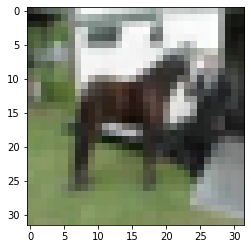

In [64]:
import matplotlib.pyplot as plt
test = x_test[20].reshape(1,3,32,32)
print(y_test[20])
test.shape
test = test.type(torch.cuda.FloatTensor)
print(torch.argmax(model(test),dim=1))#.dtype)
plt.imshow(test.to(torch.uint8).cpu().numpy().reshape(32,32,3))

tensor([4], dtype=torch.uint8)
tensor([4], device='cuda:0')


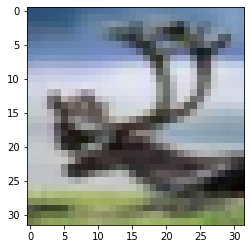

In [63]:

import matplotlib.pyplot as plt
test = x_test[40].reshape(1,3,32,32)
print(y_test[40])
test.shape
test = test.type(torch.cuda.FloatTensor)
print(torch.argmax(model(test),dim=1))#.dtype)
plt.imshow(test.to(torch.uint8).cpu().numpy().reshape(32,32,3))

tensor([8], dtype=torch.uint8)
tensor([8], device='cuda:0')


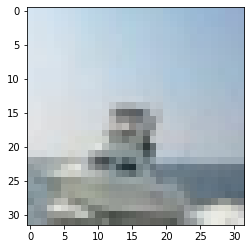

In [68]:
test = x_train[100].reshape(1,3,32,32)
print(y_train[100])
test.shape
test = test.type(torch.cuda.FloatTensor)
print(torch.argmax(model(test),dim=1))#.dtype)
plt.imshow(test.to(torch.uint8).cpu().numpy().reshape(32,32,3))